# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        response = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adre
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | ambatondrazaka
Processing Record 6 of Set 1 | tsabong
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | sarkand
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | meyungs
City not found. Skipping...
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | sampit
Processing Record 16 of Set 1 | winfield
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | sainte-rose
Processing Record 19 of Set 1 | oil city
Processing Record 20 of Set 1 | luena
Processing Record 21 of Set 1 | va

Processing Record 35 of Set 4 | tateyama
Processing Record 36 of Set 4 | xicotencatl
Processing Record 37 of Set 4 | halalo
City not found. Skipping...
Processing Record 38 of Set 4 | bandarbeyla
Processing Record 39 of Set 4 | barentu
Processing Record 40 of Set 4 | victor harbor
Processing Record 41 of Set 4 | xinmin
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | hihifo
City not found. Skipping...
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | kupang
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | wete
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | portland
Processing Record 0 of Set 5 | cidreira
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | saldanha
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | yar-sale
Processing Record 6 of Set 5 | limpapa
P

Processing Record 25 of Set 8 | kawalu
Processing Record 26 of Set 8 | dustlik
Processing Record 27 of Set 8 | dryden
Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | uberlandia
Processing Record 30 of Set 8 | macaiba
Processing Record 31 of Set 8 | chimbote
Processing Record 32 of Set 8 | mekhe
Processing Record 33 of Set 8 | paamiut
Processing Record 34 of Set 8 | itarema
Processing Record 35 of Set 8 | kaitangata
Processing Record 36 of Set 8 | cabras
Processing Record 37 of Set 8 | alotau
City not found. Skipping...
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | sabha
Processing Record 40 of Set 8 | souillac
Processing Record 41 of Set 8 | taoudenni
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | tete
Processing Record 44 of Set 8 | two rivers
Processing Record 45 of Set 8 | marawi
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | chagda
City not found. Skipping...
Processing Record 48

Processing Record 12 of Set 12 | opuwo
Processing Record 13 of Set 12 | hualmay
Processing Record 14 of Set 12 | riyadh
Processing Record 15 of Set 12 | orlik
Processing Record 16 of Set 12 | pachino
Processing Record 17 of Set 12 | itamaraju
Processing Record 18 of Set 12 | gushikawa
Processing Record 19 of Set 12 | batagay
Processing Record 20 of Set 12 | baiquan
Processing Record 21 of Set 12 | santa isabel
Processing Record 22 of Set 12 | north bend
Processing Record 23 of Set 12 | chapais
Processing Record 24 of Set 12 | pirsagi
City not found. Skipping...
Processing Record 25 of Set 12 | shinjo
Processing Record 26 of Set 12 | agua dulce
Processing Record 27 of Set 12 | saint anthony
Processing Record 28 of Set 12 | haukipudas
Processing Record 29 of Set 12 | sobolevo
Processing Record 30 of Set 12 | harlingen
Processing Record 31 of Set 12 | pedernales
Processing Record 32 of Set 12 | matara
Processing Record 33 of Set 12 | kishi
Processing Record 34 of Set 12 | labrea
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adre,13.4667,22.2000,303.00,13,95,4.24,TD,1679041005
1,ushuaia,-54.8000,-68.3000,277.96,87,100,10.80,AR,1679041006
2,port elizabeth,-33.9180,25.5701,299.31,78,0,6.69,ZA,1679041006
3,castro,-24.7911,-50.0119,289.28,92,100,3.94,BR,1679041007
4,ambatondrazaka,-17.8333,48.4167,300.82,65,99,1.09,MG,1679041007


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adre,13.4667,22.2000,303.00,13,95,4.24,TD,1679041005
1,ushuaia,-54.8000,-68.3000,277.96,87,100,10.80,AR,1679041006
2,port elizabeth,-33.9180,25.5701,299.31,78,0,6.69,ZA,1679041006
3,castro,-24.7911,-50.0119,289.28,92,100,3.94,BR,1679041007
4,ambatondrazaka,-17.8333,48.4167,300.82,65,99,1.09,MG,1679041007


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

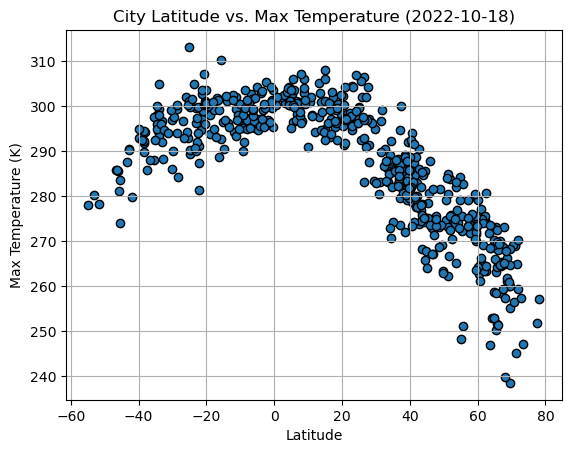

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

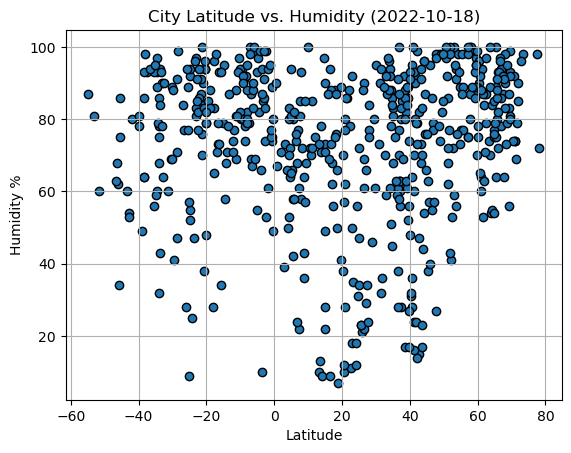

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

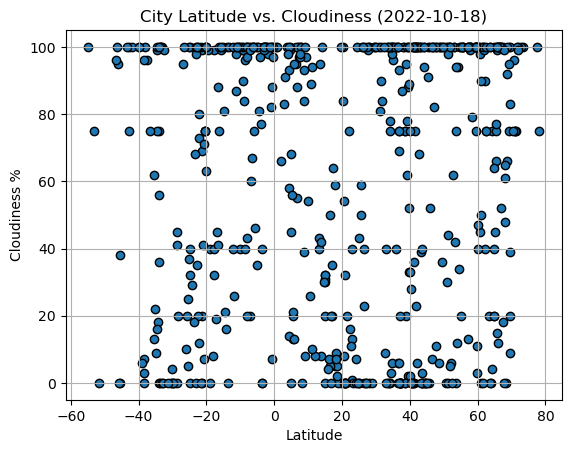

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

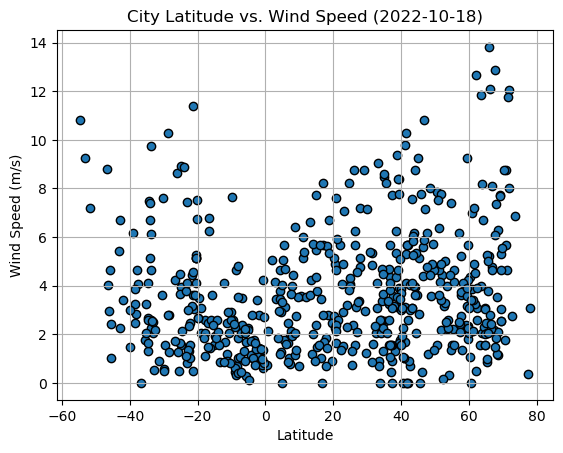

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adre,13.4667,22.2000,303.00,13,95,4.24,TD,1679041005
6,sarkand,45.4100,79.9186,275.12,63,100,2.85,KZ,1679041009
9,lazaro cardenas,17.9583,-102.2000,295.33,88,5,1.84,MX,1679041011
12,winfield,37.2398,-96.9956,273.53,60,0,7.72,US,1679040918
13,albany,42.6001,-73.9662,273.83,82,100,0.68,US,1679041013


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,277.96,87,100,10.80,AR,1679041006
2,port elizabeth,-33.9180,25.5701,299.31,78,0,6.69,ZA,1679041006
3,castro,-24.7911,-50.0119,289.28,92,100,3.94,BR,1679041007
4,ambatondrazaka,-17.8333,48.4167,300.82,65,99,1.09,MG,1679041007
5,tsabong,-26.0217,22.4010,301.94,28,10,8.63,BW,1679041008


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8945699114125992


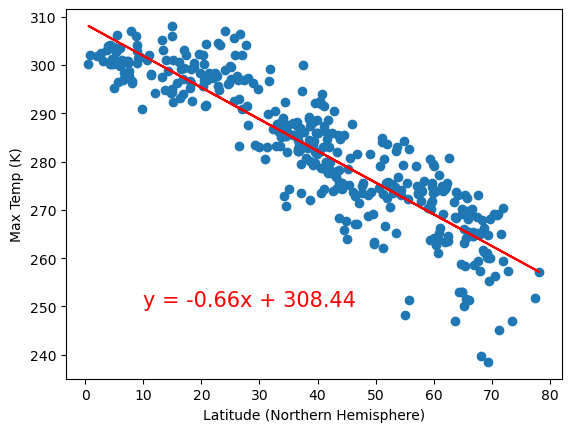

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,250),fontsize=15,color="red")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Max Temp (K)')

plt.savefig("../output_data/Fig5.png")

print(f'The r-value is: {rvalue}')

The r-value is: 0.5613306723235992


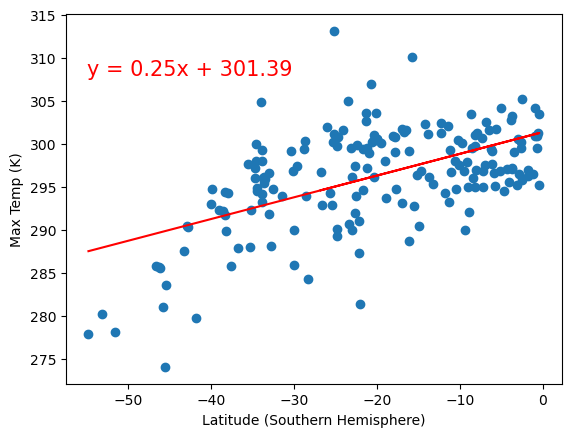

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,308),fontsize=15,color="red")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Max Temp (K)')

plt.savefig("../output_data/Fig6.png")

print(f'The r-value is: {rvalue}')

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3448007343638929


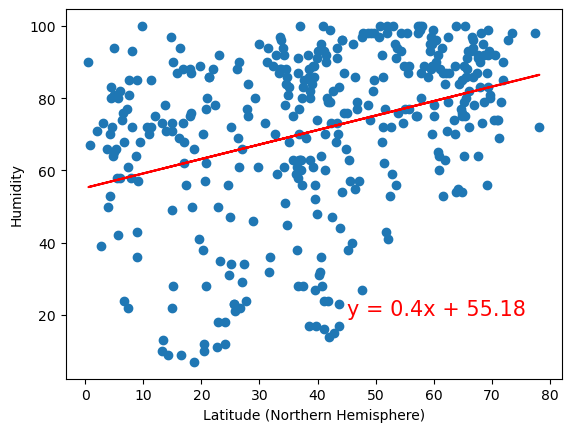

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Humidity')

plt.savefig("../output_data/Fig7.png")

print(f'The r-value is: {rvalue}')

The r-value is: 0.18151186781937


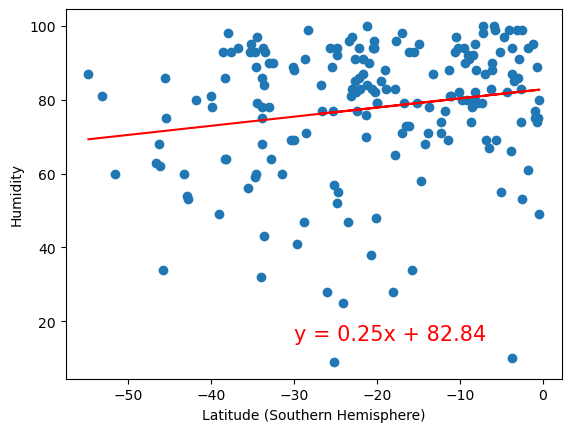

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Humidity')

plt.savefig("../output_data/Fig8.png")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** For the Northern hemisphere there is a positive correlation between humidity and latitude moving away from 0. Southern hemisphere there is also a positive correlation between humidity and latitude moving towards zero. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18263884046303205


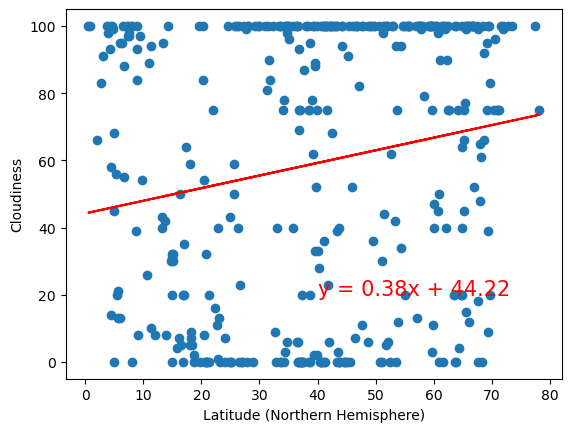

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Cloudiness')

plt.savefig("../output_data/Fig9.png")

print(f'The r-value is: {rvalue}')


The r-value is: 0.2724855862950164


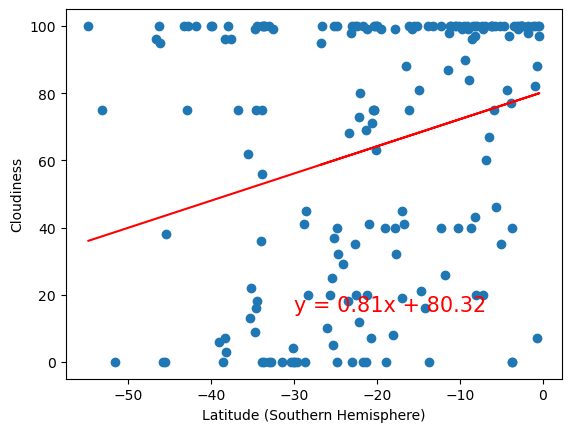

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Cloudiness')

plt.savefig("../output_data/Fig10.png")

print(f'The r-value is: {rvalue}')


**Discussion about the linear relationship:** For the Nothern hemisphere there is a positive correlation between cloudiness and the latitude moving away from zero. For the Southern hemisphere there is a positive correlation between cloudiness and the latitude moving towards zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17112564042087097


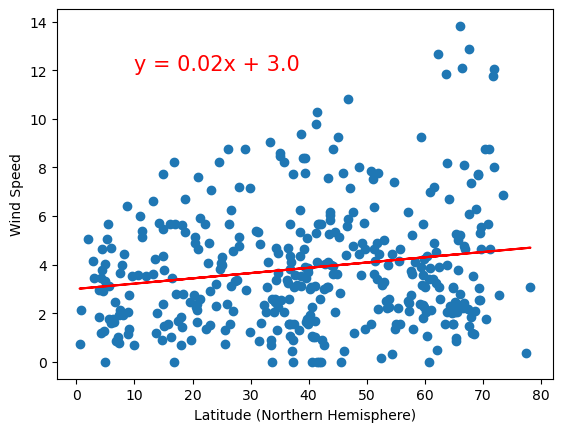

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Wind Speed')

plt.savefig("../output_data/Fig11.png")

print(f'The r-value is: {rvalue}')

The r-value is: -0.4212013877048759


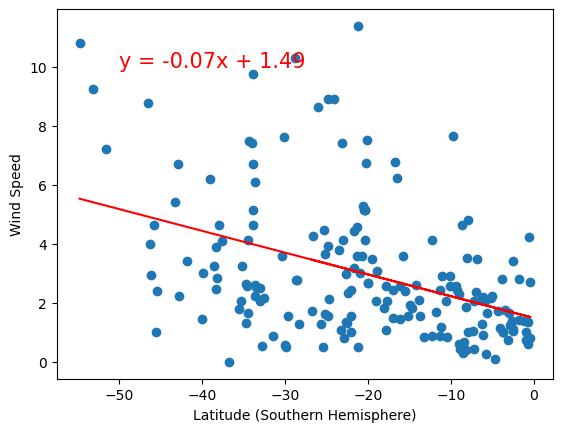

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Wind Speed')

plt.savefig("../output_data/Fig12.png")

print(f'The r-value is: {rvalue}')


**Discussion about the linear relationship:** For the Northern hemisphere there is a positive correlation between wind speed and the latitude moving away from zero. For the Southern hemisphere there is a negative correlation between wind speed and the latitude moving towards zero.